# Violence Case Analysis for Brazil

# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

## Parameters

In [2]:
ALL_COUNTRIES_DATASET = "../../../data/RQ2/processed/all_countries_df.csv"
BRAZIL_MAP_DATA = "../../../data/RQ2/raw/bcim_2016_21_11_2018.gpkg"

## Configuration

In [3]:
%matplotlib inline

# Loading the Datasets

In [4]:
df = pd.read_csv(ALL_COUNTRIES_DATASET)

In [5]:
df = df[df['country'].str.fullmatch('Brazil')]

In [6]:
df.head()

,country,measure,location,sex,age_sort,age,cause,year,val
456000,Brazil,YLLs (Years of Life Lost),Paraná,Male,0,1 to 4,Interpersonal violence,2010,145.114710
456001,Brazil,YLLs (Years of Life Lost),Paraná,Female,0,1 to 4,Interpersonal violence,2010,109.739815
456002,Brazil,YLLs (Years of Life Lost),Paraná,Male,1,5 to 9,Interpersonal violence,2010,141.150050
456003,Brazil,YLLs (Years of Life Lost),Paraná,Female,1,5 to 9,Interpersonal violence,2010,87.885475
456004,Brazil,YLLs (Years of Life Lost),Paraná,Male,2,10 to 14,Interpersonal violence,2010,654.965579


In [7]:
df.shape

(61560, 9)

### Calculate overall diabetes average in Brazil only

In [8]:
overall_diabetes_death_avg = df[df['measure'].str.contains('Deaths') &
                 df['cause'].str.contains('Diabetes')]
overall_diabetes_death_avg = overall_diabetes_death_avg['val'].mean()
overall_diabetes_death_avg  

136.1865621273738

### Create table of demographs with homicide rate higher than diabetes average

In [9]:
#get rows with higher homicide rate than overall_diabetes_avg
high_violence_death_rate_demos = df[df['measure'].str.contains('Deaths') &
                  df['cause'].str.contains('Interpersonal violence')]

high_violence_death_rate_demos = high_violence_death_rate_demos[high_violence_death_rate_demos['val'] > overall_diabetes_death_avg]
high_violence_death_rate_demos = high_violence_death_rate_demos.sort_values(by=['val'], ascending=False)
high_violence_death_rate_demos.shape

(407, 9)

In [10]:
high_violence_death_rate_demos.head()

,country,measure,location,sex,age_sort,age,cause,year,val
457900,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2011,390.170354
456452,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2010,378.401649
460141,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2012,359.100583
459878,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2013,349.784489
469044,Brazil,Deaths,Alagoas,Male,2,20 to 24,Interpersonal violence,2014,326.618712


## Death Rate exploration

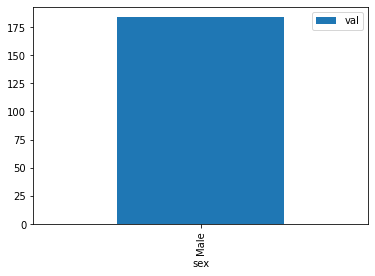

In [11]:
gender = high_violence_death_rate_demos.groupby(['sex'], as_index=False).agg({'val':'mean'})

gender.plot(x="sex", y="val", kind="bar")
plt.show()

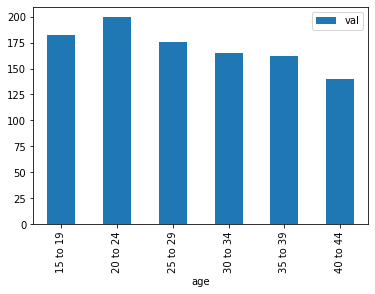

In [12]:
age = high_violence_death_rate_demos.groupby(['age'], as_index=False).agg({'val':'mean'})

age.plot(x="age", y="val", kind="bar")
plt.show()

In [13]:
locations_containing_high_violence_demos = high_violence_death_rate_demos.groupby(['location', 'year'], as_index=False).agg({'year': 'count', 'val':'mean'})
locations_containing_high_violence_demos.head(20)

,location,year,val
0,Acre,2,144.680689
1,Acre,3,155.462412
2,Alagoas,6,240.058929
3,Alagoas,6,247.131925
4,Alagoas,6,231.210221
5,Alagoas,5,244.328924
6,Alagoas,6,217.312412
7,Alagoas,5,211.546078
8,Alagoas,5,208.679168
9,Alagoas,5,204.046440


In [14]:
location_by_year_frequency = locations_containing_high_violence_demos.groupby('location').count()
location_by_year_frequency['val'].describe()

count    18.000000
mean      8.277778
std       3.025491
min       2.000000
25%       7.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: val, dtype: float64

In [15]:
location_by_year_frequency

,year,val
location,,
Acre,2,2
Alagoas,10,10
Amapá,10,10
Amazonas,10,10
Bahia,10,10
Ceará,10,10
Distrito Federal,3,3
Espírito Santo,10,10
Goiás,10,10


In [16]:
country_filter = high_violence_death_rate_demos.groupby('country').count()['val']
country_filter

country
Brazil    407
Name: val, dtype: int64

In [17]:
location_filter = high_violence_death_rate_demos.groupby('location', as_index=False).count()
location_filter = location_filter[['location', 'val']]
location_filter

,location,val
0,Acre,5
1,Alagoas,54
2,Amapá,19
3,Amazonas,17
4,Bahia,22
5,Ceará,37
6,Distrito Federal,5
7,Espírito Santo,30
8,Goiás,27
9,Mato Grosso,6


In [18]:
gender_filter = high_violence_death_rate_demos.groupby('sex', as_index=False).count()
gender_filter

,sex,country,measure,location,age_sort,age,cause,year,val
0,Male,407,407,407,407,407,407,407,407


In [19]:
age_filter = high_violence_death_rate_demos.groupby('age', as_index=False).count()
age_filter = age_filter[['age', 'val']]
age_filter

,age,val
0,15 to 19,91
1,20 to 24,148
2,25 to 29,110
3,30 to 34,42
4,35 to 39,12
5,40 to 44,4


In [20]:
#we campare number of demographs (using deaths) vs the total number of demographs that have a higher iv homicide rate than 
#overall overall average.
newdf = df[df['measure'].str.contains("Deaths")]
print("Total number of sub groups: ", len(newdf))
print("Number of sub groups with higher violence death rate than diabetes death rate: ", len(high_violence_death_rate_demos))
print("Percentage of sub groups with higher violence death rate than diabetes death rate: ", round((100 * (len(high_violence_death_rate_demos)/len(newdf))), 3))

Total number of sub groups:  20520
Number of sub groups with higher violence death rate than diabetes death rate:  407
Percentage of sub groups with higher violence death rate than diabetes death rate:  1.983


### Create table that lets us compare high homicde demographs to their corresponding diabetes death rates

In [21]:
diabetes_death = df[df['measure'].str.contains('Deaths') &
             df['cause'].str.contains('Diabetes')]

In [22]:
#create a new df using multiindex to combine the high homicide demographs with their corresponding diabetes deaths
#This cell get the diabetes rows
diabetes_death = diabetes_death[diabetes_death.set_index(['country','location', 'sex', 'age', 'year']).index.isin(high_violence_death_rate_demos.set_index(['country', 'location', 'sex', 'age', 'year']).index)]
newdf.shape

(20520, 9)

In [23]:
#combine the tables 
higher_violence_death_rate_with_diabetes = diabetes_death.append(high_violence_death_rate_demos)
higher_violence_death_rate_with_diabetes = higher_violence_death_rate_with_diabetes.sort_values(by=['location', 'sex', 'age', 'year'])
higher_violence_death_rate_with_diabetes.head(40)

,country,measure,location,sex,age_sort,age,cause,year,val
476492,Brazil,Deaths,Acre,Male,2,15 to 19,Diabetes mellitus,2017,0.634399
476530,Brazil,Deaths,Acre,Male,2,15 to 19,Interpersonal violence,2017,149.263577
469470,Brazil,Deaths,Acre,Male,2,20 to 24,Diabetes mellitus,2016,0.947388
473656,Brazil,Deaths,Acre,Male,2,20 to 24,Interpersonal violence,2016,145.175626
476494,Brazil,Deaths,Acre,Male,2,20 to 24,Diabetes mellitus,2017,0.930765
476532,Brazil,Deaths,Acre,Male,2,20 to 24,Interpersonal violence,2017,156.661334
469472,Brazil,Deaths,Acre,Male,2,25 to 29,Diabetes mellitus,2016,1.813549
473658,Brazil,Deaths,Acre,Male,2,25 to 29,Interpersonal violence,2016,144.185752
476496,Brazil,Deaths,Acre,Male,2,25 to 29,Diabetes mellitus,2017,1.793672
476534,Brazil,Deaths,Acre,Male,2,25 to 29,Interpersonal violence,2017,160.462325


In [24]:
higher_violence_death_rate_with_diabetes.shape

(814, 9)

## YLL rate Exploration

### Calculate overall diabetes average for YLLs

In [25]:
overall_diabetes_yll_avg = df[df['measure'].str.contains('YLL') &
                 df['cause'].str.contains('Diabetes')]
overall_diabetes_yll_avg = overall_diabetes_yll_avg['val'].mean()
overall_diabetes_yll_avg  

1757.314449649769

### Create table of demographs with higher homicide rate

In [26]:
#get rows with higher homicide rate than overall_diabetes_avg
high_violence_yll_demos = df[df['measure'].str.contains('YLL') &
                  df['cause'].str.contains('Interpersonal violence')]

high_violence_yll_demos = high_violence_yll_demos[high_violence_yll_demos['val'] > overall_diabetes_yll_avg]
high_violence_yll_demos = high_violence_yll_demos.sort_values(by=['val'], ascending=False)
high_violence_yll_demos.shape

(2007, 9)

## YLL Rate exploration

In [27]:
gender = high_violence_yll_demos.groupby(['sex'], as_index=False).agg({'val':'mean'})

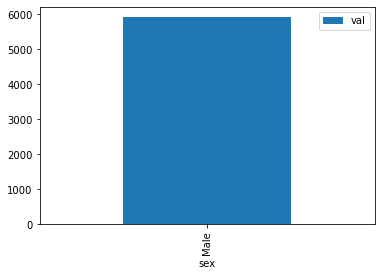

In [28]:
gender.plot(x="sex", y="val", kind="bar")
plt.show()

In [29]:
age = high_violence_yll_demos.groupby(['age'], as_index=False).agg({'val':'mean'})

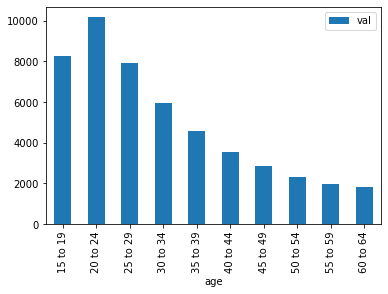

In [30]:
age.plot(x="age", y="val", kind="bar")
plt.show()

In [31]:
locations_containing_high_violence_demos = high_violence_yll_demos.groupby(['location', 'year'], as_index=False).agg({'year': 'count', 'val':'mean'})
locations_containing_high_violence_demos.head(20)
#38 demos in each region (for one year)

,location,year,val
0,Acre,7,4402.430072
1,Acre,7,4316.903107
2,Acre,8,4360.201613
3,Acre,7,4790.615410
4,Acre,7,4983.609557
5,Acre,7,5234.648765
6,Acre,8,5917.437723
7,Acre,8,6445.405210
8,Acre,7,5946.091302
9,Acre,7,5758.881480


In [32]:
location_by_year_frequency = locations_containing_high_violence_demos.groupby('location').count()
location_by_year_frequency['val'].describe()

count    27.0
mean     10.0
std       0.0
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: val, dtype: float64

In [33]:
location_by_year_frequency

,year,val
location,,
Acre,10,10
Alagoas,10,10
Amapá,10,10
Amazonas,10,10
Bahia,10,10
Ceará,10,10
Distrito Federal,10,10
Espírito Santo,10,10
Goiás,10,10


### Take high_violence_ylls_demos and filter on the consistent demographs

In [34]:
high_violence_yll_demos.groupby('country').count()['val']

country
Brazil    2007
Name: val, dtype: int64

In [35]:
location_filter = high_violence_yll_demos.groupby('location', as_index=False).count()
location_filter = location_filter[['location', 'val']]
location_filter

,location,val
0,Acre,73
1,Alagoas,91
2,Amapá,75
3,Amazonas,80
4,Bahia,89
5,Ceará,85
6,Distrito Federal,63
7,Espírito Santo,81
8,Goiás,78
9,Maranhão,84


In [36]:
gender_filter = high_violence_yll_demos.groupby('sex', as_index=False).count()
gender_filter = gender_filter[['sex', 'val']]
gender_filter

,sex,val
0,Male,2007


In [37]:
age_filter = high_violence_yll_demos.groupby('age', as_index=False).count()
age_filter = age_filter[['age', 'val']]
age_filter

,age,val
0,15 to 19,270
1,20 to 24,270
2,25 to 29,270
3,30 to 34,270
4,35 to 39,261
5,40 to 44,246
6,45 to 49,214
7,50 to 54,150
8,55 to 59,55
9,60 to 64,1


In [38]:
#we campare number of demographs (using YLLs) vs the total number of demographs that have a higher iv homicide rate than 
#overall overall average.
newdf = df[df['measure'].str.contains("YLL")]
print("Total number of sub groups: ", len(newdf))
print("Number of sub groups with higher violence YLL rate than diabetes YLL rate: ", len(high_violence_yll_demos))

Total number of sub groups:  20520
Number of sub groups with higher violence YLL rate than diabetes YLL rate:  2007


### Create table that lets us compare high homicde demographs to their corresponding diabetes yll rates

In [39]:
diabetes_ylls = df[df['measure'].str.contains('YLL') &
             df['cause'].str.contains('Diabetes')]

In [40]:
#create a new df using multiindex to combine the high homicide demographs with their corresponding diabetes deaths
#This cell get the diabetes rows
diabetes_ylls = diabetes_ylls[diabetes_ylls.set_index(['country','location', 'sex', 'age', 'year']).index.isin(high_violence_yll_demos.set_index(['country', 'location', 'sex', 'age', 'year']).index)]
diabetes_ylls.shape

(2007, 9)

In [41]:
#combine the tables 
higher_violence_ylls_with_diabetes = diabetes_ylls.append(high_violence_yll_demos)
higher_violence_ylls_with_diabetes = higher_violence_ylls_with_diabetes.sort_values(by=['location', 'sex', 'age', 'year'])
higher_violence_ylls_with_diabetes.head(20)

,country,measure,location,sex,age_sort,age,cause,year,val
456348,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2010,36.295712
456386,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2010,5625.088880
458735,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2011,37.459295
458773,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2011,5311.182626
460978,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2012,32.618349
461016,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2012,5644.124860
464310,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2013,32.968004
464348,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2013,5594.900991
467692,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2014,33.043311
472764,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2014,5783.962561


In [42]:
higher_violence_ylls_with_diabetes.shape

(4014, 9)

## DALY rate Exploration

### Calculate overall diabetes average for DALYs

In [43]:
overall_diabetes_daly_avg = df[df['measure'].str.contains('DALY') &
                 df['cause'].str.contains('Diabetes')]
overall_diabetes_daly_avg = overall_diabetes_daly_avg['val'].mean()
overall_diabetes_daly_avg  

2894.154796739017

### Create table of demographs with higher homicide rate

In [44]:
#get rows with higher homicide rate than overall_diabetes_avg
high_violence_daly_demos = df[df['measure'].str.contains('daly') &
                  df['cause'].str.contains('Interpersonal violence')]

high_violence_daly_demos = high_violence_daly_demos[high_violence_daly_demos['val'] > overall_diabetes_daly_avg]
high_violence_daly_demos = high_violence_daly_demos.sort_values(by=['val'], ascending=False)
high_violence_daly_demos.shape

(0, 9)

No demographs so we have nothing to explore with DALYs

# Results

## Setup data for Map

In [45]:
state_dict = {'Paraná': 'PR',
 'Alagoas': 'AL',
 'Amazonas' : 'AM',
 'Rio de Janeiro' : 'RJ',
 'Paraíba': 'PB',
 'Roraima': 'RR',
 'Acre': 'AC',
 'Piaui': 'PI',
 'Amapá': 'AP',
 'Minas Gerais': 'MG',
 'Bahia': 'BA',
 'Pará': 'PA',
 'Sergipe': 'SE',
 'Mato Grosso': 'MT',
 'Ceará': 'CE',
 'Espírito Santo': 'ES',
 'Pernambuco': 'PE',
 'Tocantins': 'TO',
 'São Paulo': 'SP',
 'Goiás': 'GO',
 'Distrito Federal': 'DF',
 'Maranhão': 'MA',
 'Rondônia': 'RO',
 'Rio Grande do Norte': 'RN',
 'Mato Grosso do Sul': 'MS',
 'Santa Catarina': 'SC',
 'Rio Grande do Sul': 'RS'}

In [46]:
higher_violence_ylls_with_diabetes['state_code'] =  higher_violence_ylls_with_diabetes['location'].map(state_dict)
higher_violence_ylls_with_diabetes

,country,measure,location,sex,age_sort,age,cause,year,val,state_code
456348,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2010,36.295712,AC
456386,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2010,5625.088880,AC
458735,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2011,37.459295,AC
458773,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Interpersonal violence,2011,5311.182626,AC
460978,Brazil,YLLs (Years of Life Lost),Acre,Male,2,15 to 19,Diabetes mellitus,2012,32.618349,AC
...,...,...,...,...,...,...,...,...,...,...
496126,Brazil,YLLs (Years of Life Lost),Tocantins,Male,2,45 to 49,Interpersonal violence,2018,2249.003455,TO
488042,Brazil,YLLs (Years of Life Lost),Tocantins,Male,2,45 to 49,Diabetes mellitus,2019,692.890253,TO
488080,Brazil,YLLs (Years of Life Lost),Tocantins,Male,2,45 to 49,Interpersonal violence,2019,2209.536580,TO
486586,Brazil,YLLs (Years of Life Lost),Tocantins,Male,2,50 to 54,Diabetes mellitus,2016,1103.864153,TO


In [47]:
state_vals = higher_violence_ylls_with_diabetes[['state_code', 'val']]
state_vals

,state_code,val
456348,AC,36.295712
456386,AC,5625.088880
458735,AC,37.459295
458773,AC,5311.182626
460978,AC,32.618349
...,...,...
496126,TO,2249.003455
488042,TO,692.890253
488080,TO,2209.536580
486586,TO,1103.864153


In [48]:
violence_cases = state_vals.groupby('state_code', as_index=False).agg({'val': 'mean'})
violence_cases

,state_code,val
0,AC,2736.366465
1,AL,5269.121199
2,AM,3006.678355
3,AP,3244.671858
4,BA,3104.403574
5,CE,4057.853918
6,DF,2675.950296
7,ES,3898.773653
8,GO,3596.331825
9,MA,2539.187476


In [49]:
violence_cases = violence_cases.rename(columns={"state_code": "state"})
violence_cases

,state,val
0,AC,2736.366465
1,AL,5269.121199
2,AM,3006.678355
3,AP,3244.671858
4,BA,3104.403574
5,CE,4057.853918
6,DF,2675.950296
7,ES,3898.773653
8,GO,3596.331825
9,MA,2539.187476


In [50]:
newdf = high_violence_death_rate_demos.groupby(['location', 'year'], as_index=False).count()
newdf

,location,year,country,measure,sex,age_sort,age,cause,val
0,Acre,2016,2,2,2,2,2,2,2
1,Acre,2017,3,3,3,3,3,3,3
2,Alagoas,2010,6,6,6,6,6,6,6
3,Alagoas,2011,6,6,6,6,6,6,6
4,Alagoas,2012,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...
144,Sergipe,2015,4,4,4,4,4,4,4
145,Sergipe,2016,5,5,5,5,5,5,5
146,Sergipe,2017,5,5,5,5,5,5,5
147,Sergipe,2018,4,4,4,4,4,4,4


In [51]:
df2 = newdf.groupby('location', as_index=False).count()
df2 = df2[['location', 'val']]
df2 = df2.rename(columns={"location": "state"})
df2

,state,val
0,Acre,2
1,Alagoas,10
2,Amapá,10
3,Amazonas,10
4,Bahia,10
5,Ceará,10
6,Distrito Federal,3
7,Espírito Santo,10
8,Goiás,10
9,Mato Grosso,6


In [52]:
df.location.unique()

array(['Paraná', 'Alagoas', 'Amazonas', 'Rio de Janeiro', 'Paraíba',
       'Roraima', 'Acre', 'Piaui', 'Amapá', 'Minas Gerais', 'Bahia',
       'Pará', 'Sergipe', 'Mato Grosso', 'Ceará', 'Espírito Santo',
       'Pernambuco', 'Tocantins', 'São Paulo', 'Goiás',
       'Distrito Federal', 'Maranhão', 'Rondônia', 'Rio Grande do Norte',
       'Mato Grosso do Sul', 'Santa Catarina', 'Rio Grande do Sul'],
      dtype=object)

In [53]:
data = {'state':['Piaui', 'Minas Gerais', 'Tocantins', 'São Paulo', 'Maranhão', 'Rondônia', 'Mato Grosso do Sul', 'Santa Catarina', 'Rio Grande do Sul'], 'val': [0,0,0,0,0,0,0,0,0]}
df3 = pd.DataFrame(data=data)
df3

,state,val
0,Piaui,0
1,Minas Gerais,0
2,Tocantins,0
3,São Paulo,0
4,Maranhão,0
5,Rondônia,0
6,Mato Grosso do Sul,0
7,Santa Catarina,0
8,Rio Grande do Sul,0


In [54]:
df3 = df2.append(df3, ignore_index=True)
df3

,state,val
0,Acre,2
1,Alagoas,10
2,Amapá,10
3,Amazonas,10
4,Bahia,10
5,Ceará,10
6,Distrito Federal,3
7,Espírito Santo,10
8,Goiás,10
9,Mato Grosso,6


In [55]:
df3['state_code'] =  df3['state'].map(state_dict)
df3 = df3[['state_code', 'val']]
df3 = df3.rename(columns={"state_code": "state"})
df3

,state,val
0,AC,2
1,AL,10
2,AP,10
3,AM,10
4,BA,10
5,CE,10
6,DF,3
7,ES,10
8,GO,10
9,MT,6


## Create Map

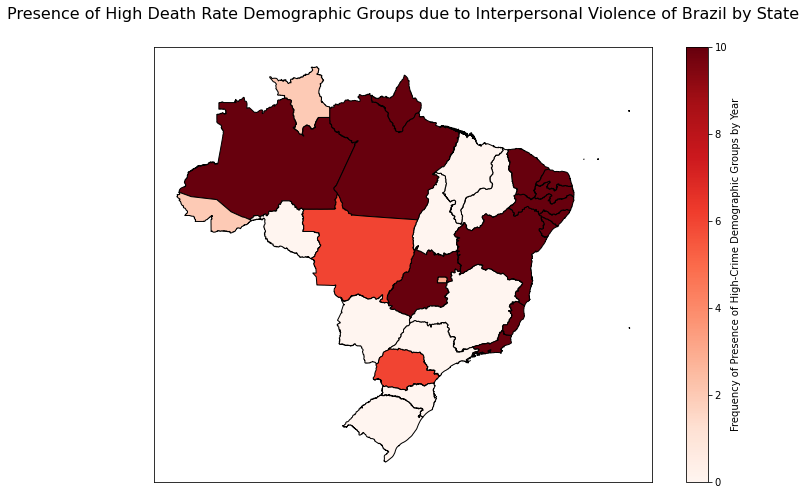

In [56]:
INFOS_UFS = gpd.read_file(BRAZIL_MAP_DATA, layer='lim_unidade_federacao_a')
INFOS_UFS.rename({'sigla': 'state'}, axis = 1, inplace = True)
BRASIL = INFOS_UFS.merge(df3, on='state', how = 'left')

fig, axs = plt.subplots(figsize = (12,8))

BRASIL.plot(ax = axs,column = 'val', cmap = 'Reds', legend = True, edgecolor = 'black', legend_kwds={'label': "Frequency of Presence of High-Crime Demographic Groups by Year", 'orientation': "vertical"})
plt.title("Presence of High Death Rate Demographic Groups due to Interpersonal Violence of Brazil by State", fontsize=16, y=1.05)

plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False) 

"""
Code Reference
Rodrigo Dutcosky (April 9 2020).Rodrigo Dutcosky. 
Available at: https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585 (Accessed 11/4/21).
"""

fig.savefig('../../../graphs/brazil_map_high_violence_demographs.png')
plt.show()

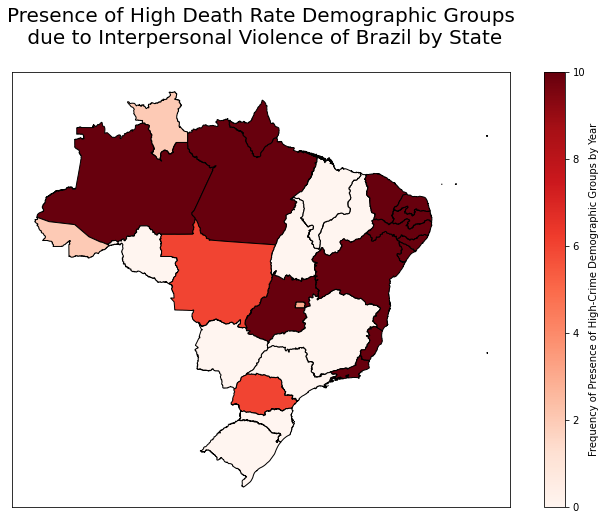

In [66]:
INFOS_UFS = gpd.read_file(BRAZIL_MAP_DATA, layer='lim_unidade_federacao_a')
INFOS_UFS.rename({'sigla': 'state'}, axis = 1, inplace = True)
BRASIL = INFOS_UFS.merge(df3, on='state', how = 'left')

fig, axs = plt.subplots(figsize = (12,8))

BRASIL.plot(ax = axs,column = 'val', cmap = 'Reds', legend = True, edgecolor = 'black', legend_kwds={'label': "Frequency of Presence of High-Crime Demographic Groups by Year", 'orientation': "vertical"})

plt.title("Presence of High Death Rate Demographic Groups\n due to Interpersonal Violence of Brazil by State", fontsize=20, y=1.05)

plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False) 
"""
Code Reference
Rodrigo Dutcosky (April 9 2020).Rodrigo Dutcosky. 
Available at: https://rodrigodutcosky.medium.com/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585 (Accessed 11/4/21).
"""

fig.savefig('../../../graphs/brazil_map_high_violence_demographs.png')
plt.show()